<a href="https://colab.research.google.com/github/Viswanathan25/Retail_sales_final-Project/blob/main/F_ML_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import ExtraTreeRegressor

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Final_project/Cleaned_Dataset.csv')
df

,Day,Month,Year,Store,Dept,Type,IsHoliday,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,5,2,2010,1,1,1,0,24924.5000,151315,42.31,2.572,6375.9129,3579.21,137.9309,32403.87,6965.516,211.096358,8.106
1,5,2,2010,1,2,1,0,50605.2700,151315,42.31,2.572,6375.9129,3579.21,137.9309,32403.87,6965.516,211.096358,8.106
2,5,2,2010,1,3,1,0,13740.1200,151315,42.31,2.572,6375.9129,3579.21,137.9309,32403.87,6965.516,211.096358,8.106
3,5,2,2010,1,4,1,0,39954.0400,151315,42.31,2.572,6375.9129,3579.21,137.9309,32403.87,6965.516,211.096358,8.106
4,5,2,2010,1,5,1,0,32229.3800,151315,42.31,2.572,6375.9129,3579.21,137.9309,32403.87,6965.516,211.096358,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551474,26,7,2013,45,94,2,0,3595.6713,118221,76.06,3.804,212.0200,851.73,4.7000,10.88,1864.570,193.589304,8.684
551475,26,7,2013,45,95,2,0,57110.5000,118221,76.06,3.804,212.0200,851.73,4.7000,10.88,1864.570,193.589304,8.684
551476,26,7,2013,45,96,2,0,189.0550,118221,76.06,3.804,212.0200,851.73,4.7000,10.88,1864.570,193.589304,8.684
551477,26,7,2013,45,97,2,0,6751.9026,118221,76.06,3.804,212.0200,851.73,4.7000,10.88,1864.570,193.589304,8.684


In [ ]:
#model prediction
#x = df[['Day','Month','Year','Store','Dept','Type','IsHoliday','Size','Temperature','Fuel_Price','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','CPI','Unemployment']]
x = df.drop('Weekly_Sales',axis=1)
y = df['Weekly_Sales']

In [ ]:
x.shape,y.shape

((551479, 17), (551479,))

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)

model = RandomForestRegressor().fit(xtrain,ytrain)

y_pre_train = model.predict(xtrain)
y_pre_test = model.predict(xtest)

#r2 score prediction
r2_train = r2_score(ytrain, y_pre_train)
r2_test = r2_score(ytest, y_pre_test)

print(f'Training_r2_score: {r2_train}, Testing_r2_score: {r2_test}')

Training_r2_score: 0.9975285906904523, Testing_r2_score: 0.9776957035108511


In [ ]:
model.fit(xtrain,ytrain)

RandomForestRegressor()

In [ ]:
#Prediction Test
# x = df.drop('Weekly_Sales',axis=1)
# y = df['Weekly_Sales']

In [ ]:
x.loc[2].tolist()

[5.0,
 2.0,
 2010.0,
 1.0,
 3.0,
 1.0,
 0.0,
 151315.0,
 42.31,
 2.572,
 6375.912900000011,
 3579.210000000004,
 137.93090000000012,
 32403.870000000075,
 6965.516000000003,
 211.0963582,
 8.106]

In [ ]:
y.loc[2].tolist()

13740.12

In [ ]:
predicted = model.predict([x.loc[2].tolist()])
predicted[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


11631.614663000002

In [ ]:
y.loc[5000]

1434.73

In [ ]:
predicted = model.predict([x.loc[5000].tolist()])

predicted[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


1416.7231089999998

**Testing the Weekly_Sales**

In [ ]:
df1 = df.copy()
df1.columns

Index(['Day', 'Month', 'Year', 'Store', 'Dept', 'Type', 'IsHoliday',
       'Weekly_Sales', 'Size', 'Temperature', 'Fuel_Price', 'MarkDown1',
       'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment'],
      dtype='object')

In [ ]:
x = df1.drop(['Weekly_Sales','MarkDown1','MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'],axis=1)
y = df1['Weekly_Sales']

In [ ]:
x.shape,y.shape

((551479, 12), (551479,))

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)

model = RandomForestRegressor().fit(xtrain,ytrain)

y_pre_train = model.predict(xtrain)
y_pre_test = model.predict(xtest)

#r2 score prediction
r2_train = r2_score(ytrain, y_pre_train)
r2_test = r2_score(ytest, y_pre_test)

print(f'Training_r2_score: {r2_train}, Testing_r2_score: {r2_test}')

Training_r2_score: 0.9976646952786006, Testing_r2_score: 0.9837087323206104


In [ ]:
x.loc[5000].tolist()

[12.0,
 2.0,
 2010.0,
 30.0,
 16.0,
 3.0,
 1.0,
 42988.0,
 37.77,
 2.548,
 210.8979935,
 8.324]

In [ ]:
y.loc[5000].tolist()

1434.73

In [ ]:
predicted = model.predict([x.loc[5000].tolist()])

predicted[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


1418.2706

# **Saving the model**

In [ ]:
import pickle
with open('F_regression.pkl', 'wb') as f:
    pickle.dump(model, f)

## **Effects of Markdown on Holiday weeks**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sn

In [ ]:
df1.columns

Index(['Day', 'Month', 'Year', 'Store', 'Dept', 'Type', 'IsHoliday',
       'Weekly_Sales', 'Size', 'Temperature', 'Fuel_Price', 'MarkDown1',
       'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment'],
      dtype='object')

**Linear Relationship**

***Correlation***

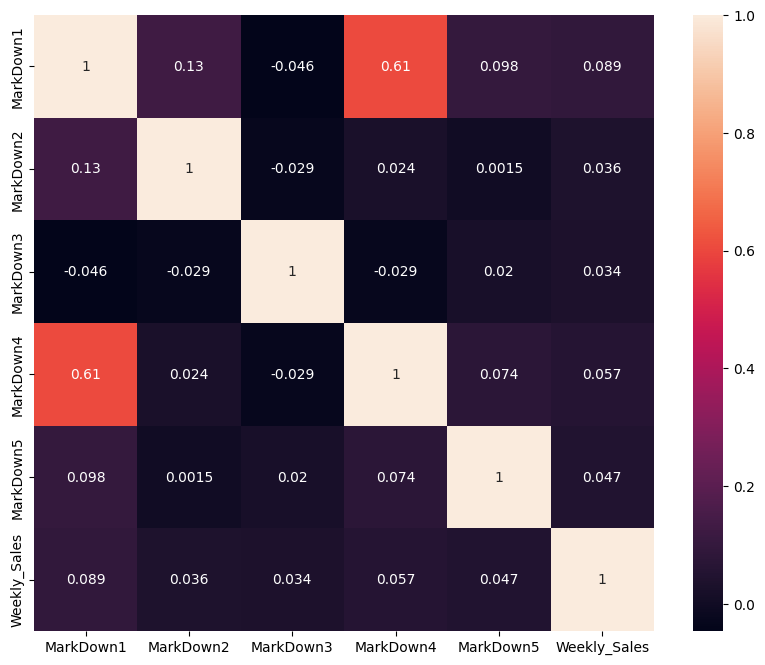

In [ ]:
plt.figure(figsize=(10,8))
x = df1[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5','Weekly_Sales']]
sn.heatmap(x.corr(),annot=True)
plt.show()

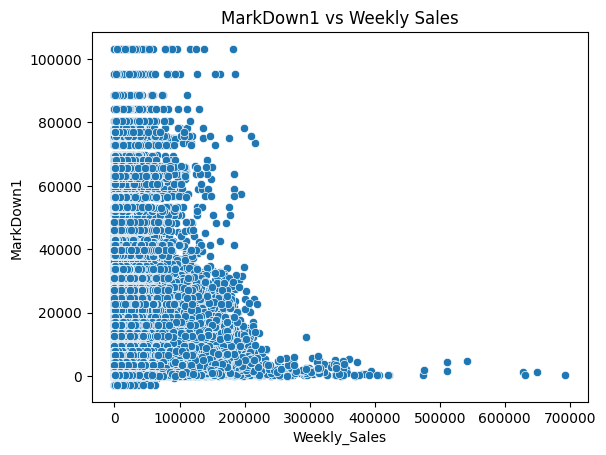

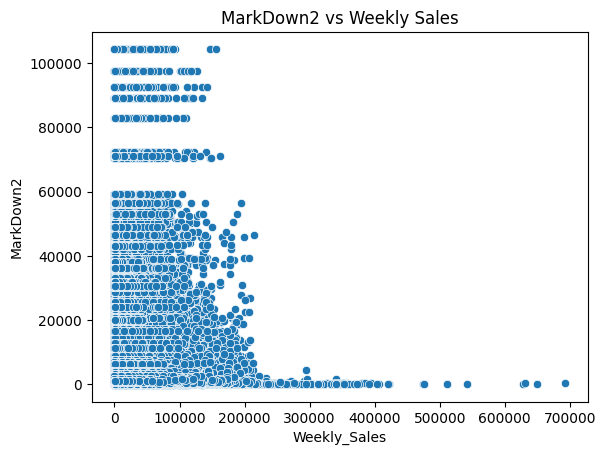

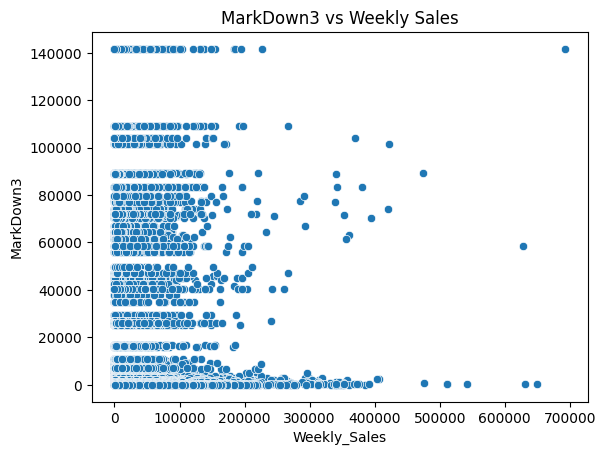

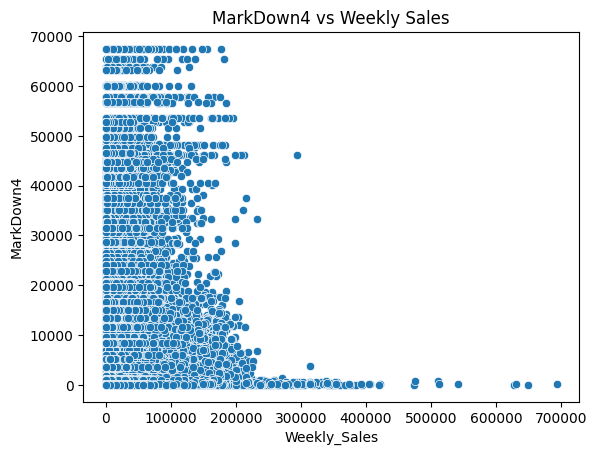

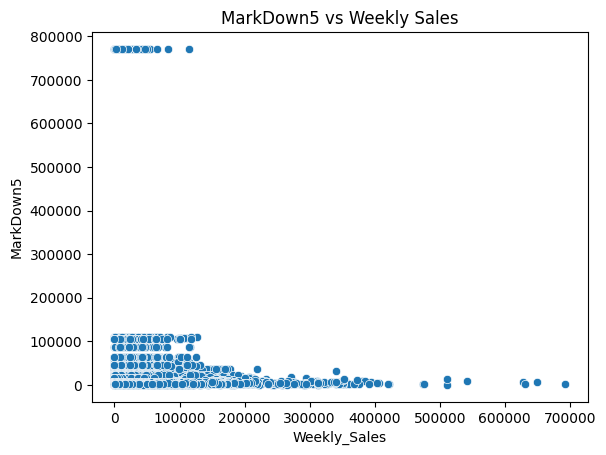

In [ ]:
#Non linear
def scatter(columns):
  for i in columns:
    sn.scatterplot(data=df1,x='Weekly_Sales',y=i)
    plt.title(f'{i} vs Weekly Sales')
    print()
    plt.show()

scatter(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'])

**Right Skewed we use log conversion**

In [ ]:
import numpy as np
def log_transformation(columns):
  for i in columns:
    df1[i] = np.log(df1[i])
log_transformation(['Weekly_Sales','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'])

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


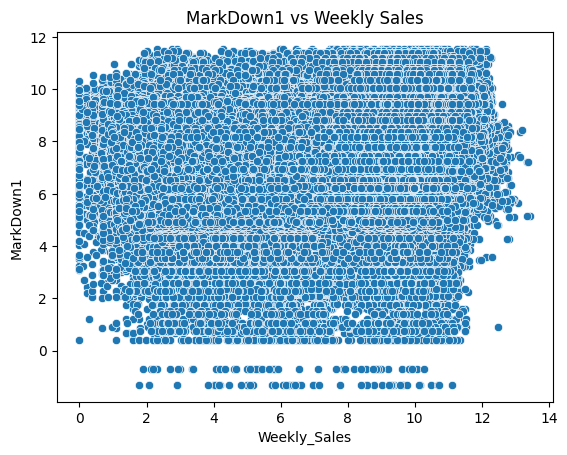

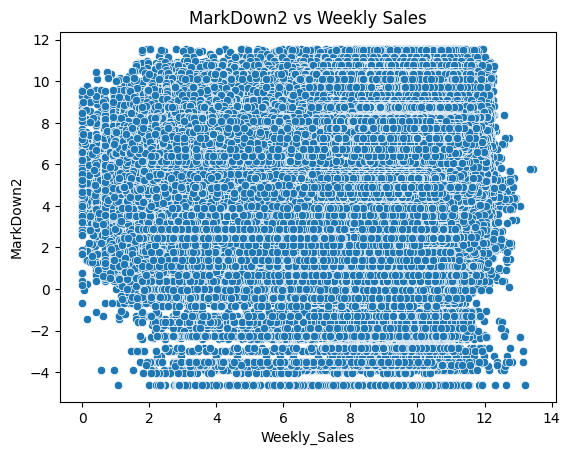

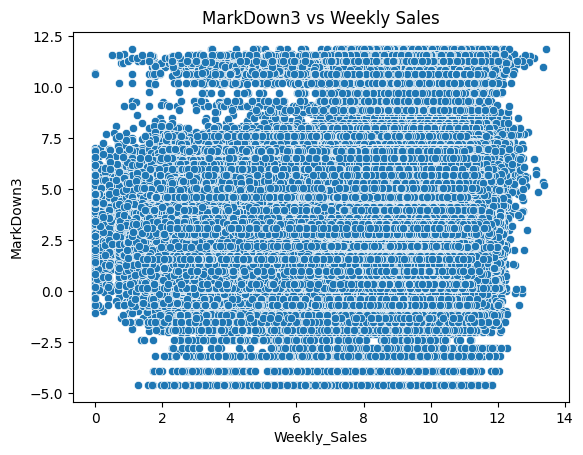

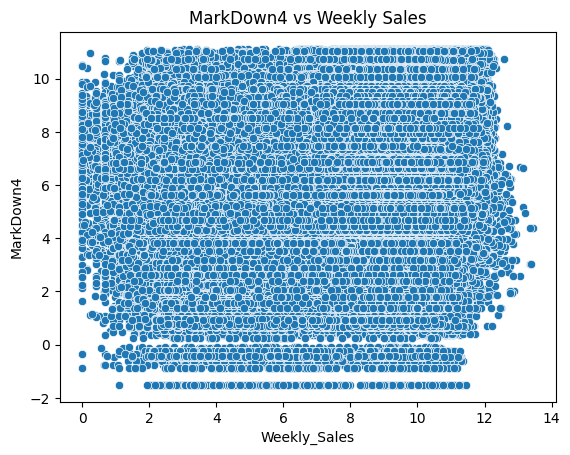

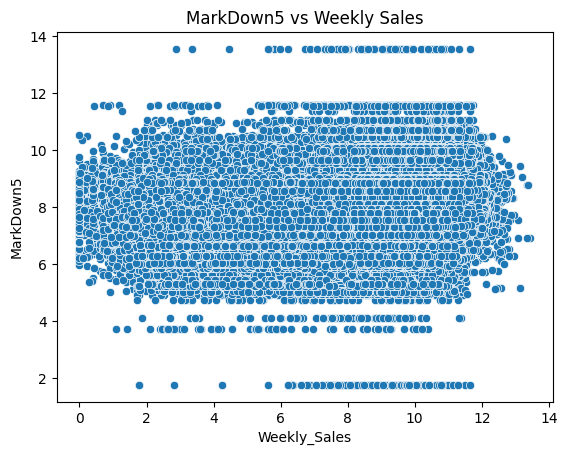

In [ ]:
def scatter(columns):
  for i in columns:
    sn.scatterplot(data=df1,x='Weekly_Sales',y=i)
    plt.title(f'{i} vs Weekly Sales')
    print()
    plt.show()

scatter(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'])

**Skewnees Correlation**

**Before Treating Skewness**

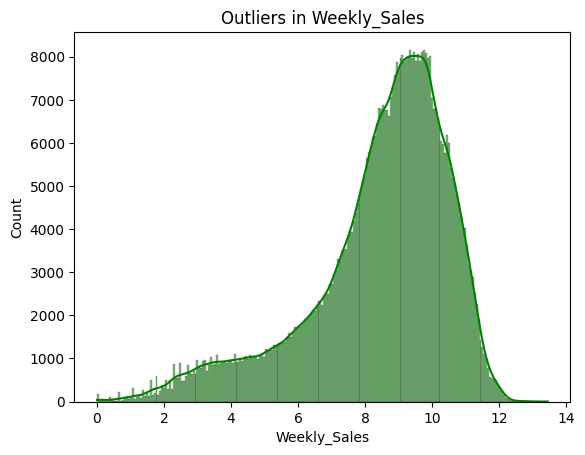

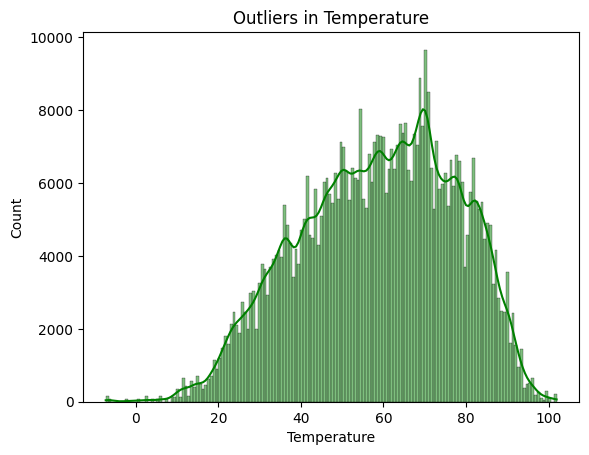

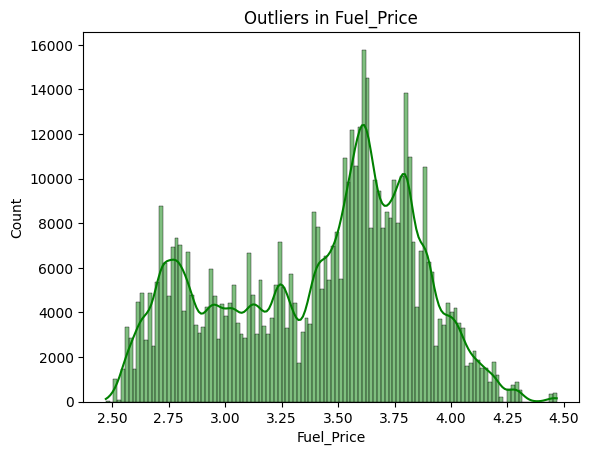

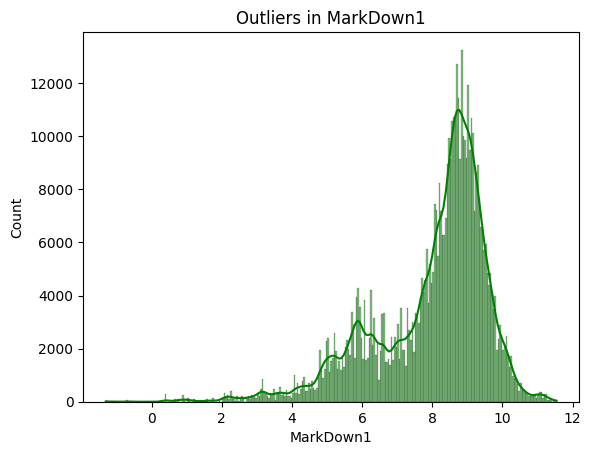

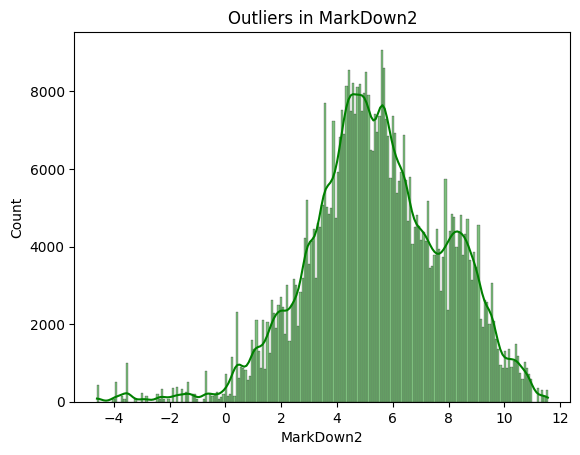

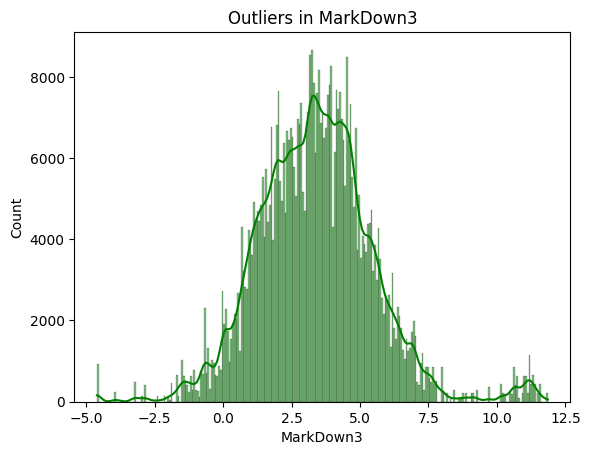

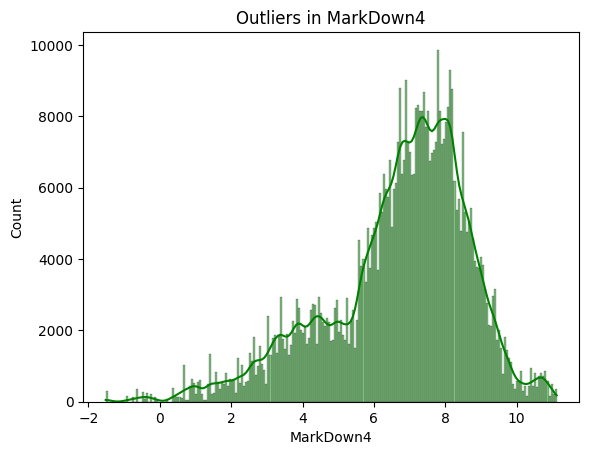

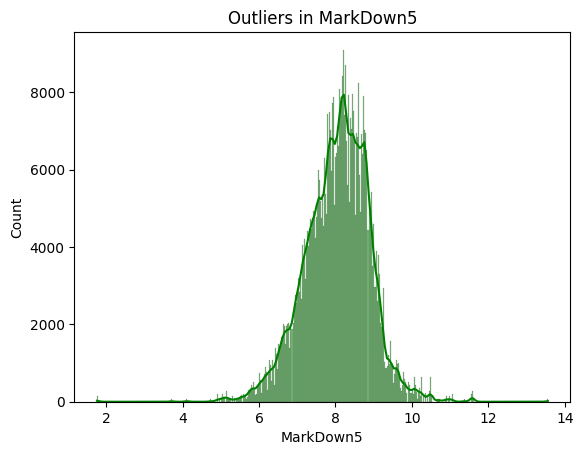

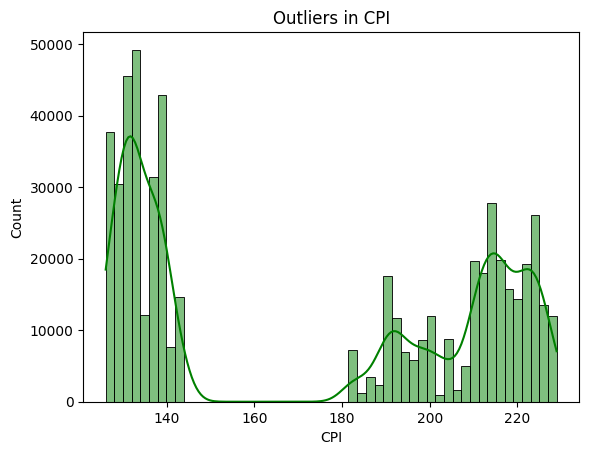

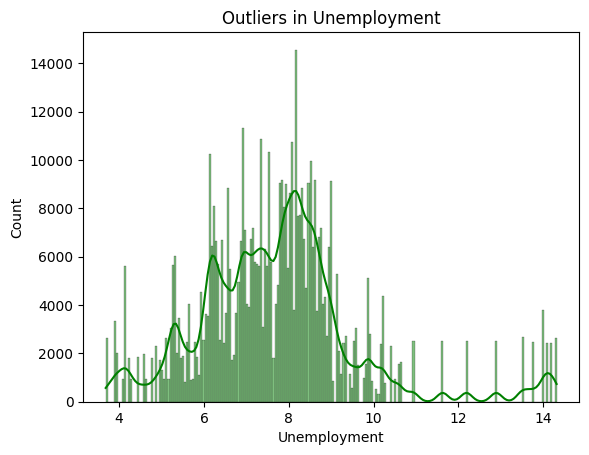

In [ ]:
def visuals(columns):
  for i in columns:
    sn.histplot(data=df1,x=i,color='g',kde=True)
    plt.title(f'Outliers in {i}')
    plt.show()
    print()
    print()

visuals([ 'Weekly_Sales', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2','MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment'])

In [ ]:
def log_transformation(columns):
  for i in columns:
    df1[i] = np.log(df1[i])
log_transformation(['Weekly_Sales', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2','MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment'])

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


**After Treating Skewness**

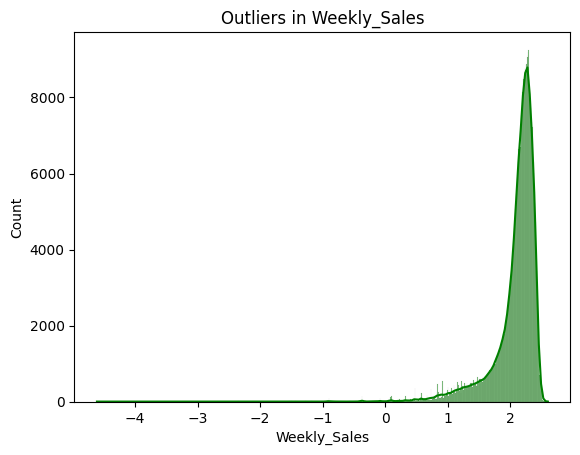

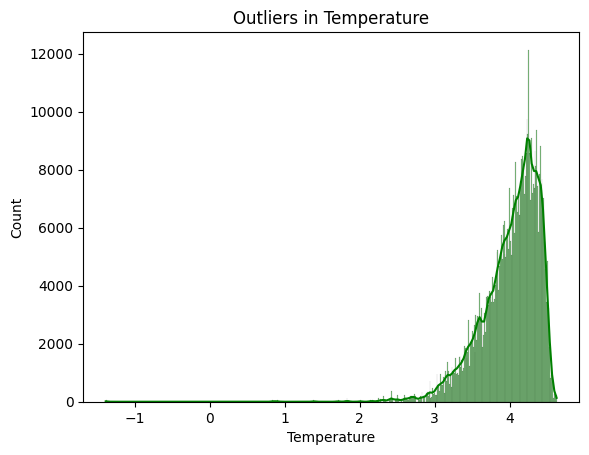

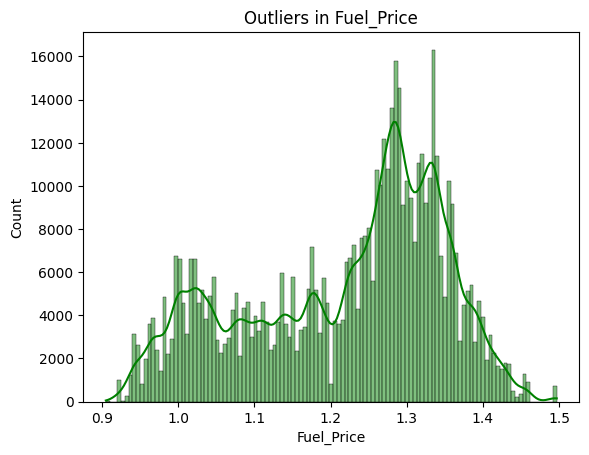

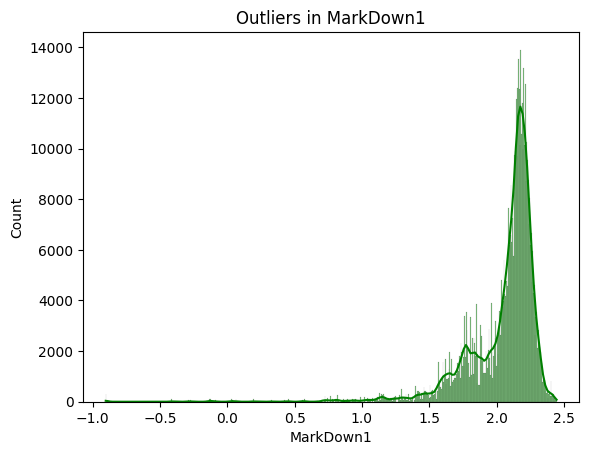

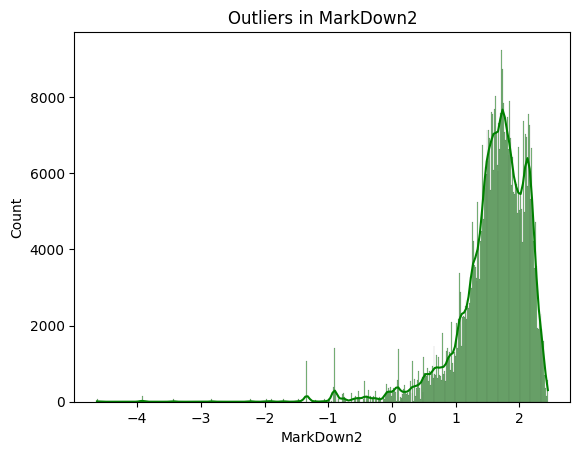

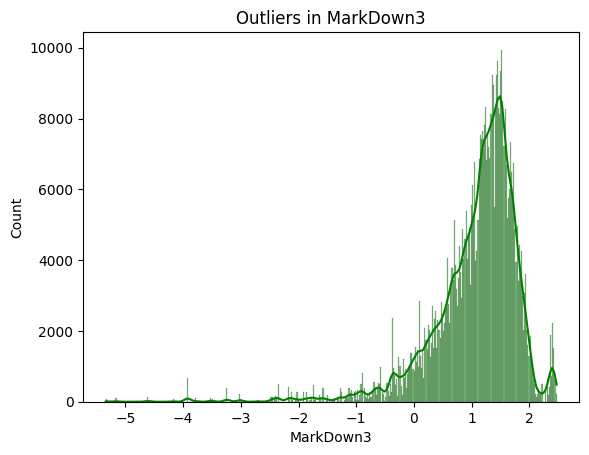

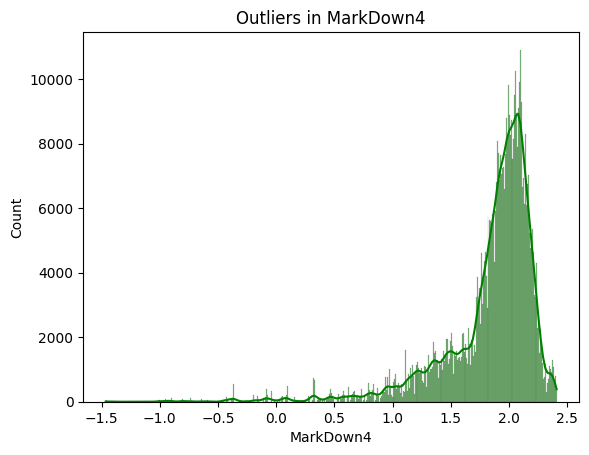

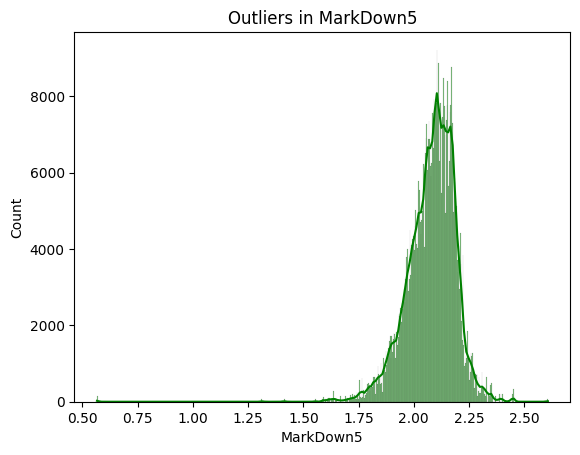

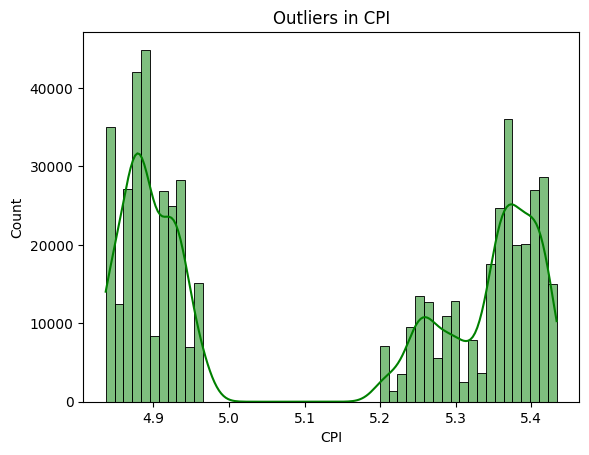

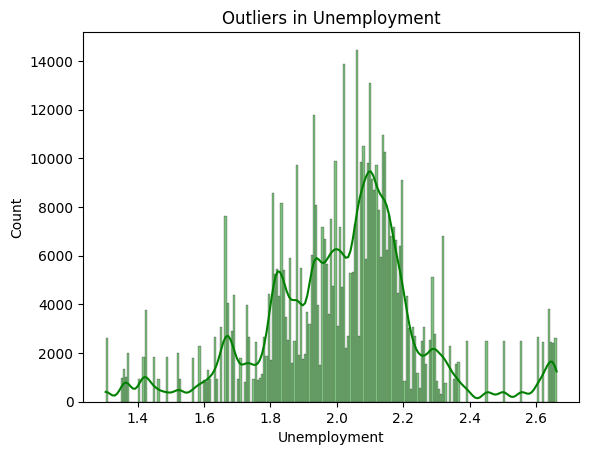

In [ ]:
def visuals(columns):
  for i in columns:
    sn.histplot(data=df1,x=i,color='g',kde=True)
    plt.title(f'Outliers in {i}')
    plt.show()
    print()
    print()

visuals(['Weekly_Sales', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2','MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment'])

In [ ]:
with open('/content/drive/MyDrive/Final_project/F_regression.pkl', 'rb') as f:
  model = pickle.load(f)

In [ ]:
model

RandomForestRegressor()

                                                                      END